In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
housing = pd.read_csv("housing.csv")
housing.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [38]:
housing.shape

(904966, 10)

In [39]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904966 entries, 0 to 904965
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          904966 non-null  object 
 1   bed             775126 non-null  float64
 2   bath            791082 non-null  float64
 3   acre_lot        638324 non-null  float64
 4   city            904894 non-null  object 
 5   state           904966 non-null  object 
 6   zip_code        904762 non-null  float64
 7   house_size      612080 non-null  float64
 8   prev_sold_date  445865 non-null  object 
 9   price           904895 non-null  float64
dtypes: float64(6), object(4)
memory usage: 69.0+ MB


In [40]:
print(f"Numerical variables in dataset: {housing.select_dtypes(exclude = ['object']).columns.tolist()}")
print(f"Categorical variables in dataset: {housing.select_dtypes(include = ['object']).columns.tolist()}")

Numerical variables in dataset: ['bed', 'bath', 'acre_lot', 'zip_code', 'house_size', 'price']
Categorical variables in dataset: ['status', 'city', 'state', 'prev_sold_date']


In [41]:
housing.describe(include = 'object')

,status,city,state,prev_sold_date
count,904966,904894,904966,445865
unique,2,2487,18,9870
top,for_sale,New York City,New Jersey,2018-07-25
freq,903373,47502,231958,317


In [42]:
housing.duplicated().sum()

794865

In [43]:
housing.drop_duplicates(inplace=True)

In [11]:
values_missing = housing.isna().sum()*100/len(housing)
print('Percentage Missing Values %')
values_missing

Percentage Missing Values %


status             0.000000
bed               15.231469
bath              14.156093
acre_lot          27.140535
city               0.019982
state              0.000000
zip_code           0.029064
house_size        32.071462
prev_sold_date    47.123096
price              0.016349
dtype: float64

In [44]:
housing = housing.drop(["city","zip_code","prev_sold_date"], axis=1)

In [45]:
housing = housing.drop(housing[housing['price'].isnull()].index)

In [46]:
housing = housing[~(housing.isna().sum(axis=1) >= 2)]

In [47]:
((housing.isna().sum() / len(housing)) * 100).sort_values(ascending=False)

acre_lot      22.921157
house_size    15.174358
bath           0.873831
bed            0.478859
status         0.000000
state          0.000000
price          0.000000
dtype: float64

In [48]:
housing = housing.drop(housing[housing['bed'].isnull()].index, axis=0)
housing = housing.drop(housing[housing['bath'].isnull()].index, axis=0)

In [49]:
housing["status"].value_counts()

for_sale    84668
Name: status, dtype: int64

In [50]:
housing = housing.drop("status", axis=1)

In [51]:
housing['acre_lot'].fillna(housing['acre_lot'].median(), inplace=True)
housing['house_size'].fillna(housing['house_size'].median(), inplace=True)

In [52]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84668 entries, 0 to 904962
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bed         84668 non-null  float64
 1   bath        84668 non-null  float64
 2   acre_lot    84668 non-null  float64
 3   state       84668 non-null  object 
 4   house_size  84668 non-null  float64
 5   price       84668 non-null  float64
dtypes: float64(5), object(1)
memory usage: 4.5+ MB


In [53]:
housing.isnull().sum()

bed           0
bath          0
acre_lot      0
state         0
house_size    0
price         0
dtype: int64

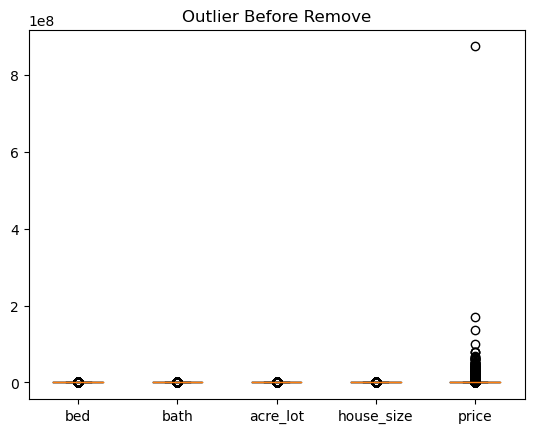

Total Row With Outlier: 84668


In [54]:
var_num = ['bed','bath','acre_lot','house_size','price']
plt.boxplot(housing[var_num])
plt.xticks([1, 2, 3, 4, 5], var_num)
plt.title('Outlier Before Remove')
plt.show()
print(f'Total Row With Outlier: {housing.shape[0]}')

In [55]:
Q1 = housing[var_num].quantile(0.25)
Q3 = housing[var_num].quantile(0.75)
IQR = Q3 - Q1

housing = housing[~((housing[var_num] < (Q1 - 1.5 * IQR)) | (housing[var_num] > (Q3 + 1.5 * IQR))).any(axis=1)]

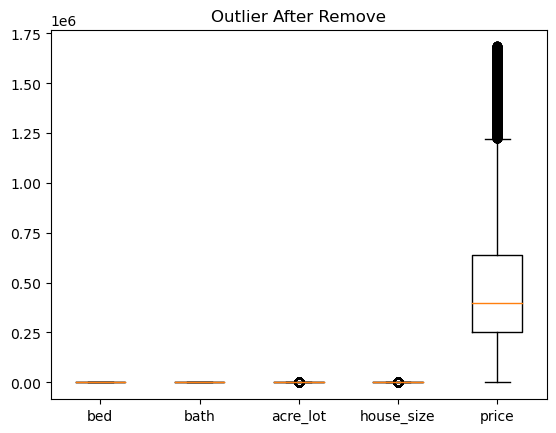

Total Row Without Outlier: 60217


In [56]:
var_num = ['bed','bath','acre_lot','house_size','price']
plt.boxplot(housing[var_num])
plt.xticks([1, 2, 3, 4, 5], var_num)
plt.title('Outlier After Remove')
plt.show()
print(f'Total Row Without Outlier: {housing.shape[0]}')

In [57]:
housing.describe()

,bed,bath,acre_lot,house_size,price
count,60217.000000,60217.000000,60217.000000,60217.000000,6.021700e+04
mean,3.011841,2.119401,0.205349,1583.793480,4.867763e+05
std,1.189865,0.873600,0.152259,625.362771,3.248066e+05
min,1.000000,1.000000,0.000000,100.000000,1.000000e+00
25%,2.000000,1.000000,0.100000,1125.000000,2.500000e+05
50%,3.000000,2.000000,0.210000,1600.000000,3.990000e+05
75%,4.000000,3.000000,0.230000,1836.000000,6.390000e+05
max,7.000000,4.000000,0.820000,3860.000000,1.685000e+06


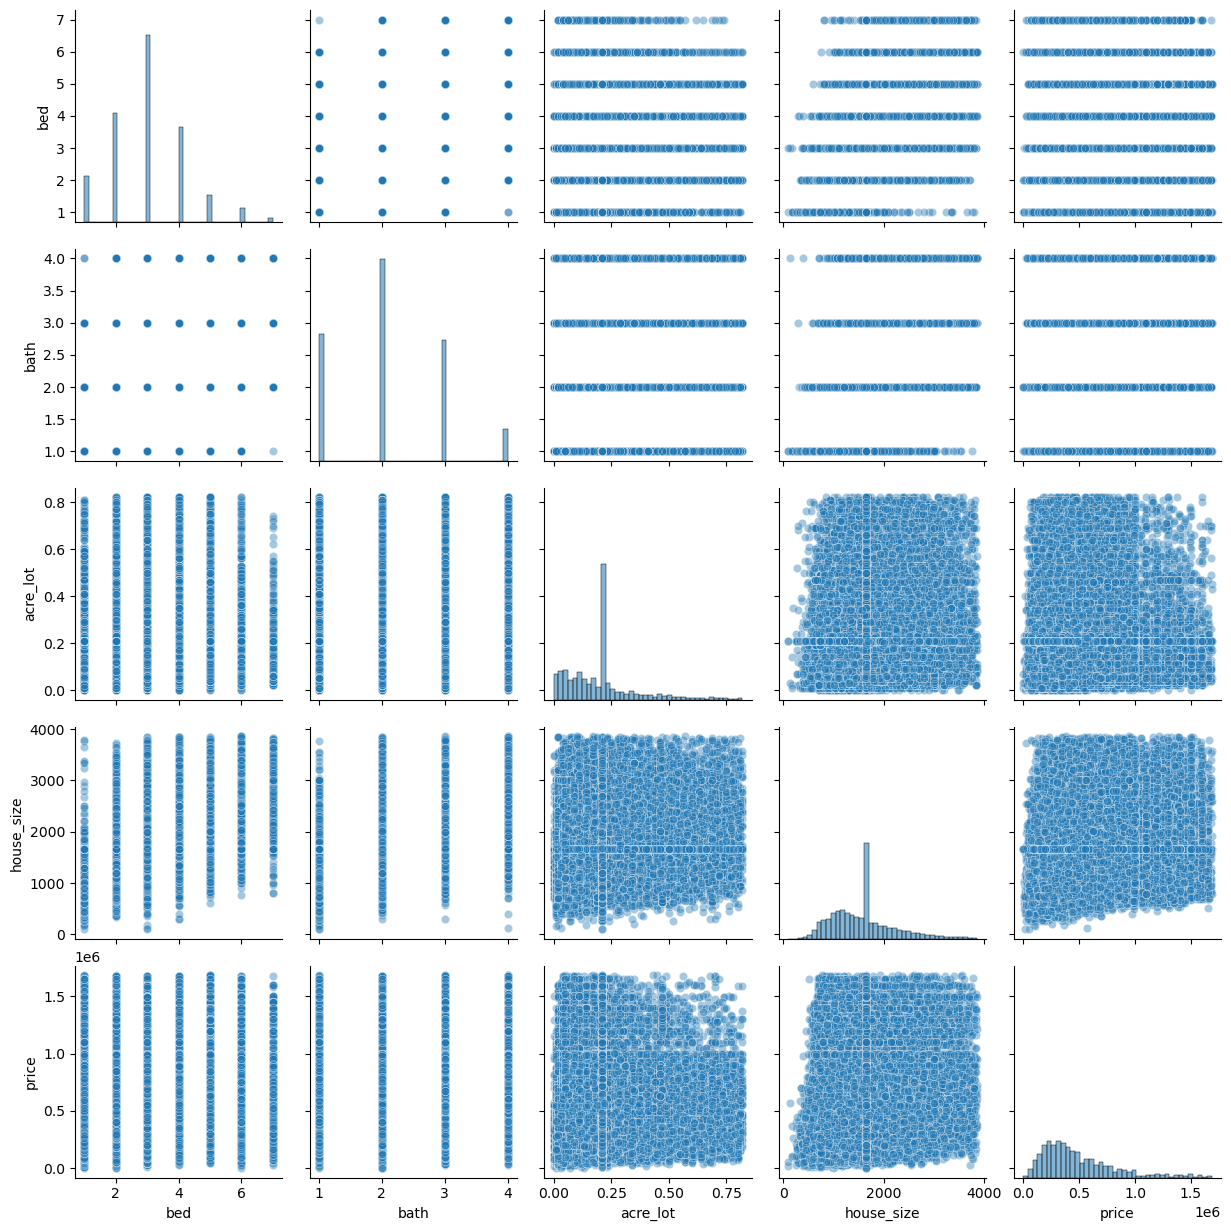

In [58]:
sns.pairplot(housing, 
             kind='scatter', 
             plot_kws={'alpha':0.4}, 
             diag_kws={'alpha':0.55, 'bins':40})

C:\Users\HP\AppData\Local\Temp\ipykernel_2256\1901337508.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



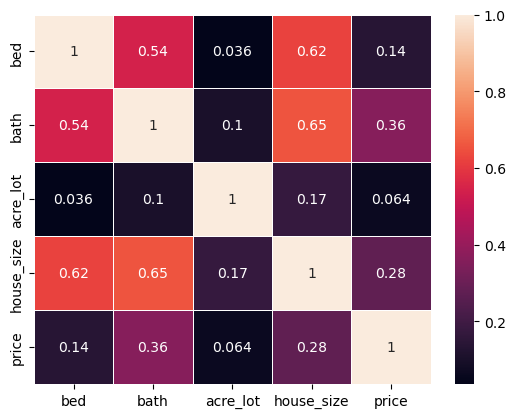

In [59]:
sns.heatmap(housing.corr(), annot=True, linewidths=0.5);

In [6]:
df_mean = housing.groupby('state')['price'].mean().reset_index()

df_mean_sort = df_mean.sort_values(by='price', ascending=False)

fig = px.bar(df_mean_sort, x='state', y='price',
             title='Top 10 States with Highest Mean Price',
             labels={'state': 'State', 'price': 'Mean Price'})
fig.update_traces(texttemplate='%{y:.1f}', textposition='outside')
fig.show()

In [67]:
housing["state"].value_counts() 

New Jersey        20545
New York          11564
Connecticut        7622
Pennsylvania       6933
Massachusetts      5639
Rhode Island       2237
Puerto Rico        1611
New Hampshire      1168
Delaware           1062
Maine              1036
Vermont             691
Virgin Islands      103
Georgia               4
Wyoming               1
West Virginia         1
Name: state, dtype: int64

In [68]:
housing = housing.drop(housing[housing["state"].map(housing["state"].value_counts()) < 50]["state"].index)

In [69]:
housing["state"].unique()

array(['Puerto Rico', 'Virgin Islands', 'Massachusetts', 'Connecticut',
       'New Jersey', 'New Hampshire', 'Vermont', 'New York',
       'Rhode Island', 'Maine', 'Pennsylvania', 'Delaware'], dtype=object)

In [75]:
housing.describe()

,bed,bath,acre_lot,house_size,price,state_numeric
count,60211.000000,60211.000000,60211.000000,60211.000000,6.021100e+04,60211.000000
mean,3.011692,2.119297,0.205348,1583.663168,4.867812e+05,4.757054
std,1.189807,0.873554,0.152266,625.214305,3.248181e+05,2.402755
min,1.000000,1.000000,0.000000,100.000000,1.000000e+00,0.000000
25%,2.000000,1.000000,0.100000,1125.000000,2.500000e+05,3.000000
50%,3.000000,2.000000,0.210000,1600.000000,3.990000e+05,5.000000
75%,4.000000,3.000000,0.230000,1835.000000,6.390000e+05,6.000000
max,7.000000,4.000000,0.820000,3860.000000,1.685000e+06,11.000000


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

In [78]:
housing['house_size'] = StandardScaler().fit_transform(housing['house_size'].values.reshape(len(housing), 1))
housing['price'] = StandardScaler().fit_transform(housing['price'].values.reshape(len(housing), 1))

In [79]:
housing['bed'] = MinMaxScaler().fit_transform(housing['bed'].values.reshape(len(housing), 1))
housing['bath'] = MinMaxScaler().fit_transform(housing['bath'].values.reshape(len(housing), 1))
housing['acre_lot'] = MinMaxScaler().fit_transform(housing['acre_lot'].values.reshape(len(housing), 1))

In [107]:
X = housing[['bed', 'bath', 'acre_lot', 'house_size', 'state_numeric']]
y = housing['price']

X = pd.get_dummies(X, columns=['state_numeric'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
lm = LinearRegression()

In [84]:
lm.fit(X_train, y_train)

LinearRegression()

In [85]:
lm.coef_


array([-0.33265033,  1.15765088,  0.14644535,  0.16167681, -0.23924252,
       -0.40808866, -0.16076011,  0.57290962, -0.09050526,  0.04930427,
        1.10013649, -0.19081693, -0.44514872,  0.03073731, -0.33640371,
        0.11787822])

In [86]:
lm.score(X, y)

0.3836448675895584

In [87]:
# The coefficients in a dataframe
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
print(cdf)

                      Coef
bed              -0.332650
bath              1.157651
acre_lot          0.146445
house_size        0.161677
state_numeric_0  -0.239243
state_numeric_1  -0.408089
state_numeric_2  -0.160760
state_numeric_3   0.572910
state_numeric_4  -0.090505
state_numeric_5   0.049304
state_numeric_6   1.100136
state_numeric_7  -0.190817
state_numeric_8  -0.445149
state_numeric_9   0.030737
state_numeric_10 -0.336404
state_numeric_11  0.117878


In [88]:
# buat model Random Forest dan latih menggunakan data training
model_RF = RandomForestRegressor(n_estimators=100, random_state=42)
model_RF.fit(X_train, y_train)

# lakukan prediksi menggunakan data testing
y_pred = model_RF.predict(X_test)

# hitung nilai rata-rata error menggunakan metrik MSE
mse_RF = mean_squared_error(y_test, y_pred)
rmse_RF = mean_squared_error(y_test, y_pred, squared=False)
mae_RF = mean_absolute_error(y_test, y_pred)
r2_RF = r2_score(y_test, y_pred)

In [89]:
result = {'Random Forest': {'MSE': mse_RF, 'RMSE': rmse_RF, 'MAE': mae_RF, 'R^2': r2_RF}
}        

In [90]:
data = pd.DataFrame.from_dict(result, orient='index')
data = data.applymap(lambda x: f'{x:.2f}')
print(data)

                MSE  RMSE   MAE   R^2
Random Forest  0.56  0.75  0.51  0.44


In [91]:
import  statsmodels.api as sm
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     1986.
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:59:31   Log-Likelihood:                -56763.
No. Observations:               48168   AIC:                         1.136e+05
Df Residuals:                   48152   BIC:                         1.137e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5178      0.013  

In [101]:
predictions = lm.predict(X_test)

In [98]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.5559875711829154
Mean Squared Error: 0.6091223092735475
Root Mean Squared Error: 0.7804628814194481


C:\Users\HP\AppData\Local\Temp\ipykernel_2256\339810671.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

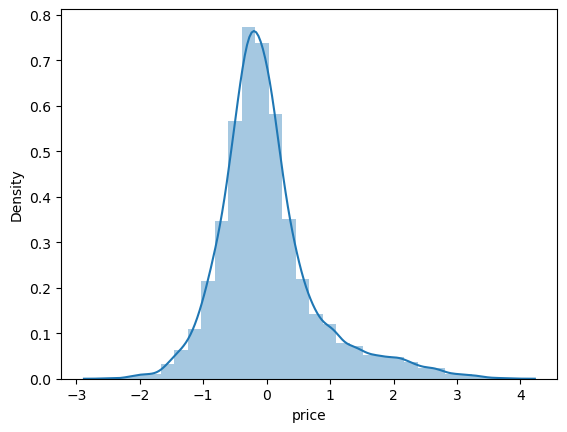

In [99]:
residuals = y_test-predictions
sns.distplot(residuals, bins=30)